# 3.1
Compare the effect of mean and median filtering on a noisy version of
the image eight.tif for salt and pepper as well as gaussian noise.

/home/nichlas/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


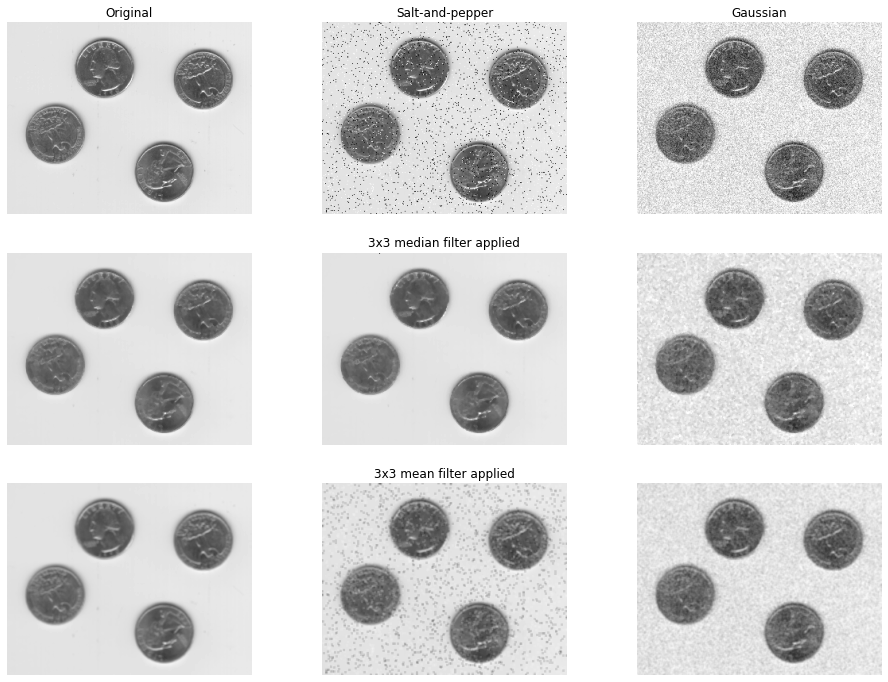

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread
from skimage import img_as_float
from scipy.signal import gaussian, convolve2d, convolve
from skimage import filters
from skimage.util import random_noise
from os import makedirs
from os.path import join
plt.rcParams["figure.figsize"] = (8,6)

images_dir = "images"
output_dir = "output/ex3"
makedirs(output_dir, exist_ok = True)

img = img_as_float(imread(join(images_dir, "eight.tif")))

#Apply additive Gaussian noise
img_gaus = random_noise(img, mode='gaussian')
#gaus_img = img_as_float(gaus_img)

#Apply salt-pepper noise
hh = np.random.rand(img.shape[0], img.shape[1])
img_sp = random_noise(img, mode='s&p', amount=0.05)

#Apply median filter
median_img = filters.median(img, np.ones((3,3)))
median_sp = filters.median(img_sp, np.ones((3,3)))
median_gaus = filters.median(img_gaus, np.ones((3,3)))

#Apply mean filter
mean_img = img_as_float( filters.rank.mean(img, np.ones((3,3))) )
mean_sp = img_as_float( filters.rank.mean(img_sp, np.ones((3,3))) )
mean_gaus = img_as_float( filters.rank.mean(img_gaus, np.ones((3,3))) )

fig, axs = plt.subplots(3,3)
fig.set_size_inches(16,12)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i,j].axis("off")

axs[0,0].imshow(img, cmap="gray", vmin=0, vmax=1)
axs[0,0].set_title("Original")
axs[0,1].imshow(img_sp, cmap="gray", vmin=0, vmax=1)
axs[0,1].set_title("Salt-and-pepper")
axs[0,2].imshow(img_gaus, cmap="gray", vmin=0, vmax=1)
axs[0,2].set_title("Gaussian")

axs[1,0].imshow(median_img, cmap="gray", vmin=0, vmax=1)
axs[1,1].imshow(median_sp, cmap="gray", vmin=0, vmax=1)
axs[1,1].set_title("3x3 median filter applied")
axs[1,2].imshow(median_gaus, cmap="gray", vmin=0, vmax=1)

axs[2,0].imshow(mean_img, cmap="gray", vmin=0, vmax=1)
axs[2,1].imshow(mean_sp, cmap="gray", vmin=0, vmax=1)
axs[2,1].set_title("3x3 mean filter applied")
axs[2,2].imshow(mean_gaus, cmap="gray", vmin=0, vmax=1)

fig.savefig(join(output_dir, "mean_median_filtering.pdf"), bbox_inches='tight')

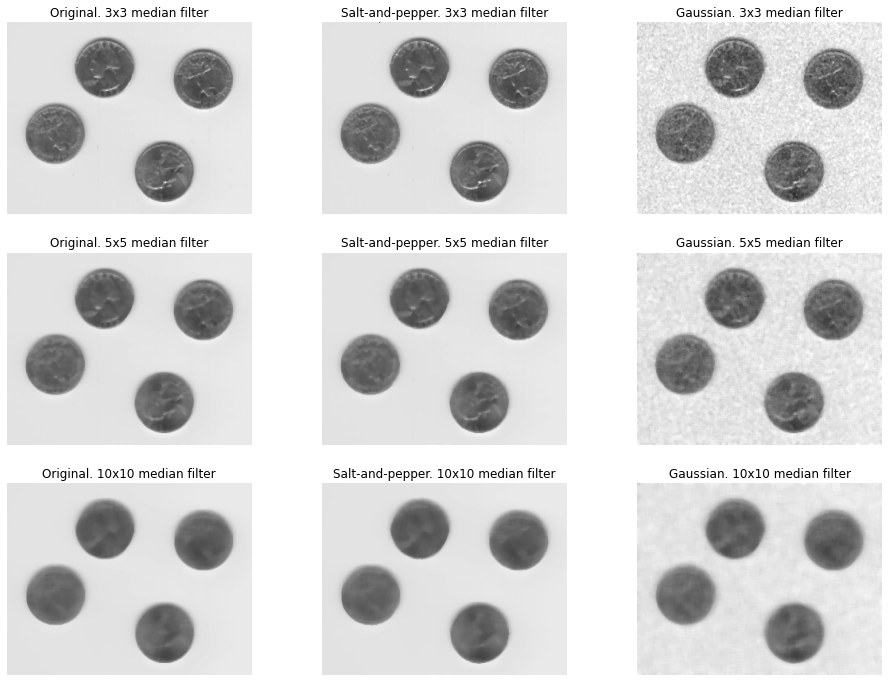

In [7]:
#Apply 3x3(N=9) median filter
_1x1median_img = filters.median(img, np.ones((3,3)))
_1x1median_sp = filters.median(img_sp, np.ones((3,3)))
_1x1median_gaus = filters.median(img_gaus, np.ones((3,3)))

#Apply 5x5(N=25) median filter
_5x5median_img = filters.median(img, np.ones((5,5)))
_5x5median_sp = filters.median(img_sp, np.ones((5,5)))
_5x5median_gaus = filters.median(img_gaus, np.ones((5,5)))

#Apply 10x10(N=100) median filter
_10x10median_img = filters.median(img, np.ones((10,10)))
_10x10median_sp = filters.median(img_sp, np.ones((10,10)))
_10x10median_gaus = filters.median(img_gaus, np.ones((10,10)))

fig, axs = plt.subplots(3,3, figsize=(16, 12))
#fig.set_size_inches(15,5)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i,j].axis("off")

axs[0,0].imshow(_1x1median_img, cmap="gray", vmin=0, vmax=1)
axs[0,0].set_title("Original. 3x3 median filter")
axs[0,1].imshow(_1x1median_sp, cmap="gray", vmin=0, vmax=1)
axs[0,1].set_title("Salt-and-pepper. 3x3 median filter")
axs[0,2].imshow(_1x1median_gaus, cmap="gray", vmin=0, vmax=1)
axs[0,2].set_title("Gaussian. 3x3 median filter")

axs[1,0].imshow(_5x5median_img, cmap="gray", vmin=0, vmax=1)
axs[1,0].set_title("Original. 5x5 median filter")
axs[1,1].imshow(_5x5median_sp, cmap="gray", vmin=0, vmax=1)
axs[1,1].set_title("Salt-and-pepper. 5x5 median filter")
axs[1,2].imshow(_5x5median_gaus, cmap="gray", vmin=0, vmax=1)
axs[1,2].set_title("Gaussian. 5x5 median filter")

axs[2,0].imshow(_10x10median_img, cmap="gray", vmin=0, vmax=1)
axs[2,0].set_title("Original. 10x10 median filter")
axs[2,1].imshow(_10x10median_sp, cmap="gray", vmin=0, vmax=1)
axs[2,1].set_title("Salt-and-pepper. 10x10 median filter")
axs[2,2].imshow(_10x10median_gaus, cmap="gray", vmin=0, vmax=1)
axs[2,2].set_title("Gaussian. 10x10 median filter")

fig.savefig(join(output_dir, "median_filters.pdf"), bbox_inches='tight')

/home/nichlas/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


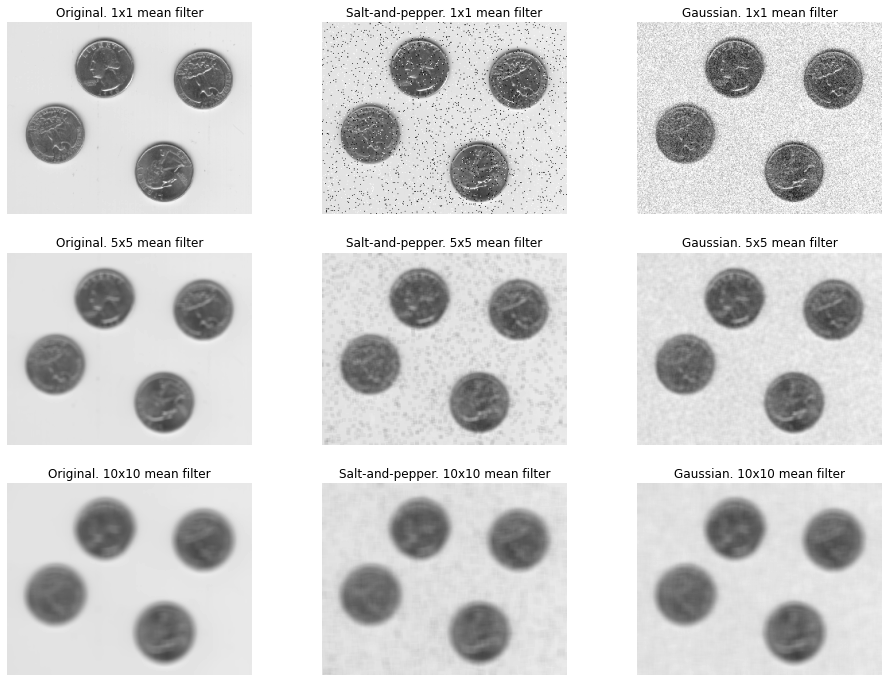

In [6]:
#Apply 1x1(N=1) mean filter
_1x1mean_img = img_as_float( filters.rank.mean(img, np.ones((1,1))) )
_1x1mean_sp = img_as_float( filters.rank.mean(img_sp, np.ones((1,1))) )
_1x1mean_gaus = img_as_float( filters.rank.mean(img_gaus, np.ones((1,1))) )

#Apply 5x5(N=25) mean filter
_5x5mean_img = img_as_float( filters.rank.mean(img, np.ones((5,5))) )
_5x5mean_sp = img_as_float( filters.rank.mean(img_sp, np.ones((5,5))) )
_5x5mean_gaus = img_as_float( filters.rank.mean(img_gaus, np.ones((5,5))) )

#Apply 10x10(N=100) mean filter
_10x10mean_img = img_as_float( filters.rank.mean(img, np.ones((10,10))) )
_10x10mean_sp = img_as_float( filters.rank.mean(img_sp, np.ones((10,10))) ) 
_10x10mean_gaus = img_as_float( filters.rank.mean(img_gaus, np.ones((10,10))) )

fig, axs = plt.subplots(3,3, figsize=(16,12))
#fig.set_size_inches(15,5)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i,j].axis("off")

axs[0,0].imshow(_1x1mean_img, cmap="gray", vmin=0, vmax=1)
axs[0,0].set_title("Original. 1x1 mean filter")
axs[0,1].imshow(_1x1mean_sp, cmap="gray", vmin=0, vmax=1)
axs[0,1].set_title("Salt-and-pepper. 1x1 mean filter")
axs[0,2].imshow(_1x1mean_gaus, cmap="gray", vmin=0, vmax=1)
axs[0,2].set_title("Gaussian. 1x1 mean filter")

axs[1,0].imshow(_5x5mean_img, cmap="gray", vmin=0, vmax=1)
axs[1,0].set_title("Original. 5x5 mean filter")
axs[1,1].imshow(_5x5mean_sp, cmap="gray", vmin=0, vmax=1)
axs[1,1].set_title("Salt-and-pepper. 5x5 mean filter")
axs[1,2].imshow(_5x5mean_gaus, cmap="gray", vmin=0, vmax=1)
axs[1,2].set_title("Gaussian. 5x5 mean filter")

axs[2,0].imshow(_10x10mean_img, cmap="gray", vmin=0, vmax=1)
axs[2,0].set_title("Original. 10x10 mean filter")
axs[2,1].imshow(_10x10mean_sp, cmap="gray", vmin=0, vmax=1)
axs[2,1].set_title("Salt-and-pepper. 10x10 mean filter")
axs[2,2].imshow(_10x10mean_gaus, cmap="gray", vmin=0, vmax=1)
axs[2,2].set_title("Gaussian. 10x10 mean filter")

fig.savefig(join(output_dir, "mean_filters.pdf"), bbox_inches='tight')

<timeit-src>:6: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.


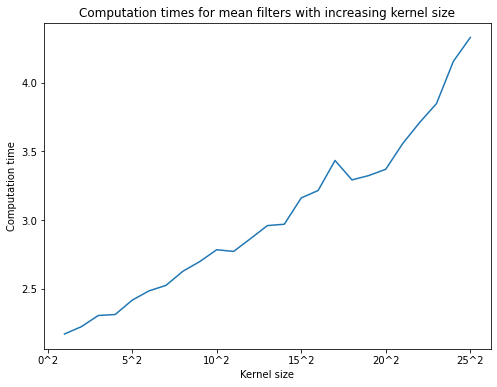

In [32]:
import timeit
import matplotlib.ticker as ticker
Nmax = 25
times_mean = []
for i in range(1,Nmax+1):
    time = timeit.timeit(lambda: filters.rank.mean(img, np.ones((i,i))), number=100)
    times_mean.append(time)
fig, ax = plt.subplots()
ax.plot(np.arange(1,Nmax+1), times_mean)
ax.set_title("Computation times for mean filters with increasing kernel size")
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d^2'))
ax.set_xlabel("Kernel size")
ax.set_ylabel("Computation time")
fig.savefig(join(output_dir, "mean_filters_compTimes.pdf"), bbox_inches='tight')

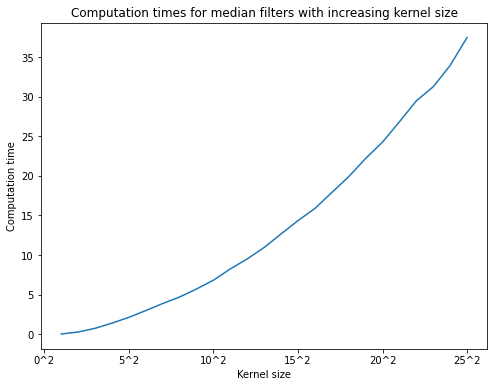

In [33]:
Nmax = 25
times_median = []
for i in range(1,Nmax+1):
    time = timeit.timeit(lambda: filters.median(img, np.ones((i,i))), number=100)
    times_median.append(time)
fig, ax = plt.subplots()
ax.plot(np.arange(1,Nmax+1), times_median)
ax.set_title("Computation times for median filters with increasing kernel size")
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d^2'))
ax.set_xlabel("Kernel size")
ax.set_ylabel("Computation time")
fig.savefig(join(output_dir, "median_filters_compTimes.pdf"), bbox_inches='tight')

In [ ]:
print(f"Time taken to perform 1x1 median filter on img: {timeit.timeit(lambda: filters.median(img, np.ones((1,1))), number=100)}")
print(f"Time taken to perform 5x5 median filter on img: {timeit.timeit(lambda: filters.median(img, np.ones((5,5))), number=100)}")
print(f"Time taken to perform 10x10 median filter on img: {timeit.timeit(lambda: filters.median(img, np.ones((10,10))), number=100)}")

# 3.2
Consider a Gaussian filter of fixed standard deviation σ = 5 and filter
the image with increasing value of kernel size N.

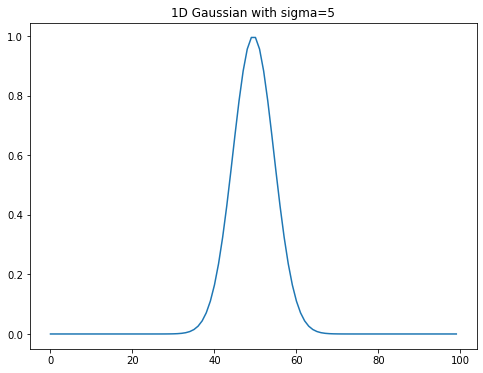

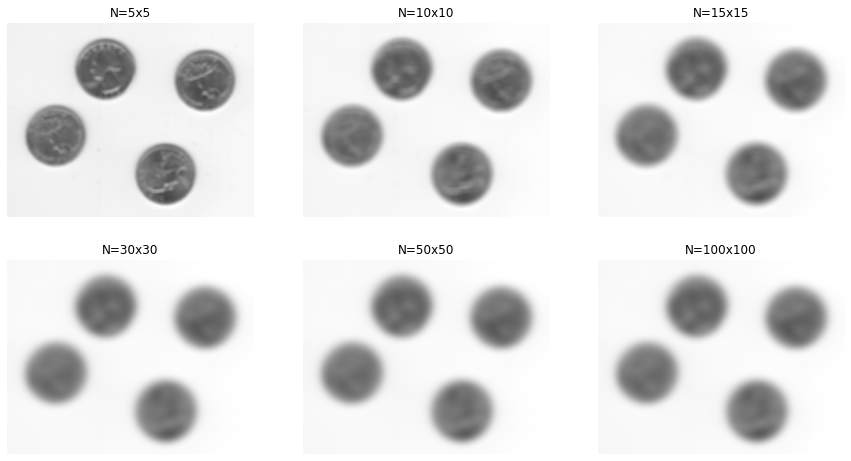

In [36]:
gaussian5sigma = gaussian(100,5)
plt.plot(np.arange(len(gaussian5sigma)), gaussian5sigma)
plt.title("1D Gaussian with sigma=5")
plt.show()

fig, axs = plt.subplots(2,3, figsize=(15,8))

Ns = [5, 10, 15, 30, 50, 100]
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i,j].axis("off")
        N = Ns[i*axs.shape[1]+j]
        gaussian1d = gaussian(N,5)
        gaussian2d = np.outer(gaussian1d, gaussian1d)
        img_gaus_conv = convolve2d(img, gaussian2d, mode="same", boundary="symm")
        axs[i,j].imshow(img_gaus_conv, cmap="gray", vmin=0)
        axs[i,j].set_title(f"N={N}x{N}")

fig.savefig(join(output_dir, "gaussian_filters_varyingN.pdf"), bbox_inches='tight')

# 3.3
Experiment with filters of increasing σ’s, choosing at each iteration
N = 3σ for the filter kernel size N × N.

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15,8))
fig2, axs2 = plt.subplots(2,3, figsize=(15,8))

sigmas = [5, 10, 15, 30, 50, 100]
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i,j].axis("off")
        sigma = sigmas[i*axs.shape[1]+j]
        gaussian1d = gaussian(3*sigma,sigma)
        gaussian2d = np.outer(gaussian1d, gaussian1d)
        img_gaus_conv = convolve2d(img, gaussian2d, mode="same", boundary="symm")
        axs[i,j].imshow(img_gaus_conv, cmap="gray", vmin=0)
        axs[i,j].set_title(f"sigma={sigma}")
        #Plot 1d gaussian functions
        axs2[i,j].plot(np.arange(len(gaussian1d)), gaussian1d)
        axs2[i,j].set_title(f"sigma={sigma}")

fig.savefig(join(output_dir, "gaussian_filters_varyingSigma.pdf"), bbox_inches='tight')